In [1]:
import numpy as np
import matplotlib.pyplot as plt
from graphstats import *
from scipy.stats import mannwhitneyu as mwu
from tqdm import tqdm_notebook as tqdm

In [2]:
n = [150, 200, 250, 300, 350, 400, 450, 500]
it = 100
seed_ratio = 0.1
pi1 = 0.5
pi2 = 1 - pi1
pis = np.array([pi1, pi2])
pi = pis

p = 0.52
q = 0.48

B = np.array([[p**2, p*q], [p*q, q**2]])

In [3]:
mu1 = 100
mu2 = 102
scale1 = 9
scale2 = 9

means = np.array([[mu1, mu2], [mu2, mu1]])
scales = np.array([[scale1, scale2], [scale2, scale1]])

ptr_ds = [[] for i in range(len(n))]
up_ds = [[] for i in range(len(n))]

for i in tqdm(range(len(n))):
    n1 = int(np.round(n[i]*seed_ratio*pi[0]))
    n2 = int(np.round(n[i]*seed_ratio*(1 - pi[0])))
    
    ns  = n1 + n2

    seeds1 = np.arange(0, n1)
    seeds2 = np.arange(int(np.round(n[i]*pi[0])), int(np.round(n[i]*pi[0])) + n2)
    all_seeds = np.concatenate((seeds1, seeds2))

    labels1 = np.zeros(len(seeds1))
    labels2 = np.ones(len(seeds2))
    seed_labels = np.concatenate((labels1, labels2))

    all_labels = np.concatenate((np.zeros(int(np.round(n[i]*pi[0]))), np.ones(int(np.round(n[i]*pi[1])))))
    
    for j in range(it):
        A = adj_matrix(n[i], pis, B, True, dist = "normal", means = means, scales = scales, acorn = j)
        
        A_ptr = pass_to_ranks(A)
        V_ptr, U_ptr = adj_spectral_embedding(A_ptr, max_dim = 2, acorn = j)
        X_hat = V_ptr[:, :1] @ (U_ptr[:1]**(1/2))
        X_hat = X_hat[:, None]
        ptr_class = gaussian_classification(X_hat, all_seeds, seed_labels)
        
        C = strip_weights(A)
        V_C, U_C = adj_spectral_embedding(C, max_dim = 2, acorn = j)
        X_hat_C = V_C[:, :1] @ (U_C[:1]**(1/2))
        X_hat_C = X_hat_C[:, None]
        
        up_class = updated_priors_classification(X_hat_C, A, all_seeds, seed_labels, "ranks", add_smoothing=1, acorn = j)
        
        ptr_ds[i].append((np.sum(ptr_class == all_labels) - ns)/(n[i] - ns))
        up_ds[i].append((np.sum(up_class == all_labels) - ns)/(n[i] - ns))

In [3]:
import _pickle as pickle
# pickle.dump(ptr_ds, open('ptr_ds.pkl', 'wb'))
# pickle.dump(up_ds, open('up_ds.pkl', 'wb'))
ptr_ds = pickle.load(open('ptr_ds.pkl', 'rb'))
up_ds = pickle.load(open('up_ds.pkl', 'rb'))

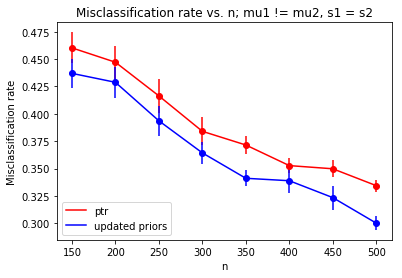

In [4]:
ptr_ds_means = np.array([np.mean(i) for i in ptr_ds])
up_ds_means = np.array([np.mean(i) for i in up_ds])

ptr_ds_std = np.array([np.std(i, ddof = 1) for i in ptr_ds])
up_ds_std = np.array([np.std(i, ddof = 1) for i in up_ds])

fig, ax = plt.subplots(1,1)

ax.plot(n, 1 - ptr_ds_means, label = 'ptr', c = 'r')
ax.plot(n, 1 - up_ds_means, label = 'updated priors', c = 'b')
ax.errorbar(n, 1 - ptr_ds_means, yerr = 1.96*ptr_ds_std/np.sqrt(it), fmt='o', c = 'r')
ax.errorbar(n, 1 - up_ds_means, yerr = 1.96*up_ds_std/np.sqrt(it), fmt='o', c = 'b')
ax.set_title('Misclassification rate vs. n; mu1 != mu2, s1 = s2')
ax.set_xlabel('n')
ax.set_ylabel('Misclassification rate')
ax.legend(loc = 'lower left')

plt.savefig('ds.png')

In [10]:
n = [150, 200, 250, 300, 350, 400, 450, 500]
it = 100
seed_ratio = 0.1
pi1 = 0.5
pi2 = 1 - pi1
pis = np.array([pi1, pi2])
pi = pis

p = 0.52
q = 0.48

B = np.array([[p**2, p*q], [p*q, q**2]])

max_dim = 1

mu1 = 100
mu2 = 102
scale1 = 4
scale2 = 9

means = np.array([[mu1, mu2], [mu2, mu1]])
scales = np.array([[scale1, scale2], [scale2, scale1]])

ptr_dd = [[] for i in range(len(n))]
up_dd = [[] for i in range(len(n))]

for i in tqdm(range(len(n))):
    n1 = int(np.round(n[i]*seed_ratio*pi[0]))
    n2 = int(np.round(n[i]*seed_ratio*(1 - pi[0])))
    
    ns  = n1 + n2

    seeds1 = np.arange(0, n1)
    seeds2 = np.arange(int(np.round(n[i]*pi[0])), int(np.round(n[i]*pi[0])) + n2)
    all_seeds = np.concatenate((seeds1, seeds2))

    labels1 = np.zeros(len(seeds1))
    labels2 = np.ones(len(seeds2))
    seed_labels = np.concatenate((labels1, labels2))

    all_labels = np.concatenate((np.zeros(int(np.round(n[i]*pi[0]))), np.ones(int(np.round(n[i]*pi[1])))))
    
    for j in range(it):
        A = adj_matrix(n[i], pis, B, True, dist = "normal", means = means, scales = scales, acorn = j)
        
        A_ptr = pass_to_ranks(A)
        V_ptr, U_ptr = adj_spectral_embedding(A_ptr, max_dim = 2, acorn = j)
        X_hat = V_ptr[:, :1] @ (U_ptr[:1]**(1/2))
        X_hat = X_hat[:, None]
        ptr_class = gaussian_classification(X_hat, all_seeds, seed_labels)
        
        C = strip_weights(A)
        V_C, U_C = adj_spectral_embedding(C, max_dim = 2, acorn = j)
        X_hat_C = V_C[:, :1] @ (U_C[:1]**(1/2))
        X_hat_C = X_hat_C[:, None]
        
        up_class = updated_priors_classification(X_hat_C, A, all_seeds, seed_labels, "ranks", add_smoothing=1, acorn = j)      
        
        ptr_dd[i].append((np.sum(ptr_class == all_labels) - ns)/(n[i] - ns))
        up_dd[i].append((np.sum(up_class == all_labels) - ns)/(n[i] - ns))

In [5]:
import _pickle as pickle
# pickle.dump(ptr_dd, open('ptr_dd.pkl', 'wb'))
# pickle.dump(up_dd, open('up_dd.pkl', 'wb'))
ptr_dd = pickle.load(open('ptr_dd.pkl', 'rb'))
up_dd = pickle.load(open('up_dd.pkl', 'rb'))

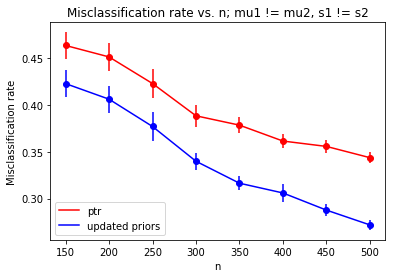

In [6]:
ptr_dd_means = np.array([np.mean(i) for i in ptr_dd])
up_dd_means = np.array([np.mean(i) for i in up_dd])

ptr_dd_std = np.array([np.std(i, ddof = 1) for i in ptr_dd])
up_dd_std = np.array([np.std(i, ddof = 1) for i in up_dd])

fig, ax = plt.subplots(1,1)

ax.plot(n, 1 - ptr_dd_means, label = 'ptr', c = 'r')
ax.plot(n, 1 - up_dd_means, label = 'updated priors', c = 'b')
ax.errorbar(n, 1 - ptr_dd_means, yerr = 1.96*ptr_dd_std/np.sqrt(it), fmt='o', c = 'r')
ax.errorbar(n, 1 - up_dd_means, yerr = 1.96*up_dd_std/np.sqrt(it), fmt='o', c = 'b')
ax.set_title('Misclassification rate vs. n; mu1 != mu2, s1 != s2')
ax.set_xlabel('n')
ax.set_ylabel('Misclassification rate')
ax.legend(loc = 'lower left')

plt.savefig('dd.png')

In [8]:
n = [150, 200, 250, 300, 350, 400, 450, 500]
it = 100
seed_ratio = 0.1
pi1 = 0.5
pi2 = 1 - pi1
pis = np.array([pi1, pi2])
pi = pis

p = 0.52
q = 0.48

B = np.array([[p**2, p*q], [p*q, q**2]])

max_dim = 1

mu1 = 100
mu2 = 100
scale1 = 4
scale2 = 9

means = np.array([[mu1, mu2], [mu2, mu1]])
scales = np.array([[scale1, scale2], [scale2, scale1]])

ptr_sd = [[] for i in range(len(n))]
up_sd = [[] for i in range(len(n))]

for i in tqdm(range(len(n))):
    n1 = int(np.round(n[i]*seed_ratio*pi[0]))
    n2 = int(np.round(n[i]*seed_ratio*(1 - pi[0])))
    
    ns  = n1 + n2

    seeds1 = np.arange(0, n1)
    seeds2 = np.arange(int(np.round(n[i]*pi[0])), int(np.round(n[i]*pi[0])) + n2)
    all_seeds = np.concatenate((seeds1, seeds2))

    labels1 = np.zeros(len(seeds1))
    labels2 = np.ones(len(seeds2))
    seed_labels = np.concatenate((labels1, labels2))

    all_labels = np.concatenate((np.zeros(int(np.round(n[i]*pi[0]))), np.ones(int(np.round(n[i]*pi[1])))))
    
    for j in range(it):
        A = adj_matrix(n[i], pis, B, True, dist = "normal", means = means, scales = scales, acorn = j)
        
        A_ptr = pass_to_ranks(A)
        V_ptr, U_ptr = adj_spectral_embedding(A_ptr, max_dim = 2, acorn = j)
        X_hat = V_ptr[:, :1] @ (U_ptr[:1]**(1/2))
        X_hat = X_hat[:, None]
        ptr_class = gaussian_classification(X_hat, all_seeds, seed_labels)
        
        C = strip_weights(A)
        V_C, U_C = adj_spectral_embedding(C, max_dim = 2, acorn = j)
        X_hat_C = V_C[:, :1] @ (U_C[:1]**(1/2))
        X_hat_C = X_hat_C[:, None]
        
        up_class = updated_priors_classification(X_hat_C, A, all_seeds, seed_labels, "ranks", add_smoothing=1, acorn = j)
        
        ptr_sd[i].append((np.sum(ptr_class == all_labels) - ns)/(n[i] - ns))
        up_sd[i].append((np.sum(up_class == all_labels) - ns)/(n[i] - ns))

In [9]:
import _pickle as pickle
pickle.dump(ptr_sd, open('ptr_sd.pkl', 'wb'))
pickle.dump(up_sd, open('up_sd.pkl', 'wb'))
ptr_sd = pickle.load(open('ptr_sd.pkl', 'rb'))
up_sd = pickle.load(open('up_sd.pkl', 'rb'))

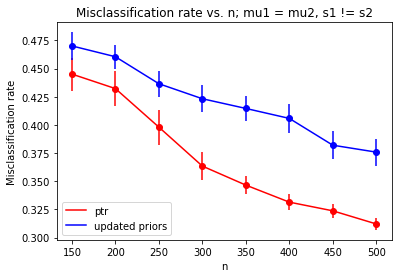

In [10]:
ptr_sd_means = np.array([np.mean(i) for i in ptr_sd])
up_sd_means = np.array([np.mean(i) for i in up_sd])

ptr_sd_std = np.array([np.std(i, ddof = 1) for i in ptr_sd])
up_sd_std = np.array([np.std(i, ddof = 1) for i in up_sd])

fig, ax = plt.subplots(1,1)

ax.plot(n, 1 - ptr_sd_means, label = 'ptr', c = 'r')
ax.plot(n, 1 - up_sd_means, label = 'updated priors', c = 'b')
ax.errorbar(n, 1 - ptr_sd_means, yerr = 1.96*ptr_sd_std/np.sqrt(it), fmt='o', c = 'r')
ax.errorbar(n, 1 - up_sd_means, yerr = 1.96*up_sd_std/np.sqrt(it), fmt='o', c = 'b')
ax.set_title('Misclassification rate vs. n; mu1 = mu2, s1 != s2')
ax.set_xlabel('n')
ax.set_ylabel('Misclassification rate')
ax.legend(loc = 'lower left')

plt.savefig('sd.png')

In [11]:
n = [150, 200, 250, 300, 350, 400, 450, 500]
it = 100
seed_ratio = 0.1
pi1 = 0.5
pi2 = 1 - pi1
pis = np.array([pi1, pi2])
pi = pis

p = 0.52
q = 0.48

B = np.array([[p**2, p*q], [p*q, q**2]])

max_dim = 1

mu1 = 100
mu2 = 100
scale1 = 9
scale2 = 9

means = np.array([[mu1, mu2], [mu2, mu1]])
scales = np.array([[scale1, scale2], [scale2, scale1]])

ptr_ss = [[] for i in range(len(n))]
up_ss = [[] for i in range(len(n))]

for i in tqdm(range(len(n))):
    n1 = int(np.round(n[i]*seed_ratio*pi[0]))
    n2 = int(np.round(n[i]*seed_ratio*(1 - pi[0])))
    
    ns  = n1 + n2

    seeds1 = np.arange(0, n1)
    seeds2 = np.arange(int(np.round(n[i]*pi[0])), int(np.round(n[i]*pi[0])) + n2)
    all_seeds = np.concatenate((seeds1, seeds2))

    labels1 = np.zeros(len(seeds1))
    labels2 = np.ones(len(seeds2))
    seed_labels = np.concatenate((labels1, labels2))

    all_labels = np.concatenate((np.zeros(int(np.round(n[i]*pi[0]))), np.ones(int(np.round(n[i]*pi[1])))))
    
    for j in range(it):
        A = adj_matrix(n[i], pis, B, True, dist = "normal", means = means, scales = scales, acorn = j)
        
        A_ptr = pass_to_ranks(A)
        V_ptr, U_ptr = adj_spectral_embedding(A_ptr, max_dim = 2, acorn = j)
        X_hat = V_ptr[:, :1] @ (U_ptr[:1]**(1/2))
        X_hat = X_hat[:, None]
        ptr_class = gaussian_classification(X_hat, all_seeds, seed_labels)
        
        C = strip_weights(A)
        V_C, U_C = adj_spectral_embedding(C, max_dim = 2, acorn = j)
        X_hat_C = V_C[:, :1] @ (U_C[:1]**(1/2))
        X_hat_C = X_hat_C[:, None]
        
        up_class = updated_priors_classification(X_hat_C, A, all_seeds, seed_labels, "ranks", add_smoothing=1, acorn = j)              
        
        ptr_ss[i].append((np.sum(ptr_class == all_labels) - ns)/(n[i] - ns))
        up_ss[i].append((np.sum(up_class == all_labels) - ns)/(n[i] - ns))

In [14]:
import _pickle as pickle
# pickle.dump(ptr_test_ss, open('ptr_ss.pkl', 'wb'))
# pickle.dump(up_test_ss, open('up_ss.pkl', 'wb'))
ptr_ss = pickle.load(open('ptr_ss.pkl', 'rb'))
up_ss = pickle.load(open('up_ss.pkl', 'rb'))

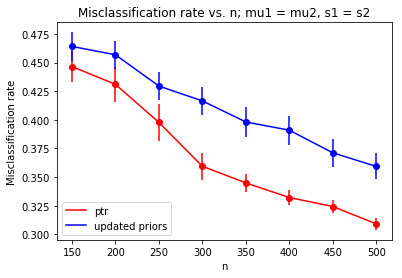

In [16]:
ptr_ss_means = np.array([np.mean(i) for i in ptr_ss])
up_ss_means = np.array([np.mean(i) for i in up_ss])

ptr_ss_std = np.array([np.std(i, ddof = 1) for i in ptr_ss])
up_ss_std = np.array([np.std(i, ddof = 1) for i in up_ss])

fig, ax = plt.subplots(1,1)

ax.plot(n, 1 - ptr_ss_means, label = 'ptr', c = 'r')
ax.plot(n, 1 - up_ss_means, label = 'updated priors', c = 'b')
ax.errorbar(n, 1 - ptr_ss_means, yerr = 1.96*ptr_ss_std/np.sqrt(it), fmt='o', c = 'r')
ax.errorbar(n, 1 - up_ss_means, yerr = 1.96*up_ss_std/np.sqrt(it), fmt='o', c = 'b')
ax.set_title('Misclassification rate vs. n; mu1 = mu2, s1 = s2')
ax.set_xlabel('n')
ax.set_ylabel('Misclassification rate')
ax.legend(loc = 'lower left')

plt.savefig('ss.png')